# Individual Final Project: Big Data
---
## GH1024311
## Christian Jensen
## Converted the .PDF book into .TXT file to be able to work with it.

---
---
# DISCLAIMER: The .txt comes from The Lord of The Rings: The Fellowship of The Ring, specifically a text sample (Chapters 1-2) _Copyright goes to The Tolkien Estate_

---
# Problem Statement

## Elaborate the Task:
- When someone wants to get into a new book, or a student is searching through countless research papers, there is always the problem of having to actually either try out reading the book or, in the case of the research papers, having to go into the document and actually read it. We all know that that task takes a lot of time, and if it is not what you're looking for, it becomes a waste of your time.
- What better way to optimize that time that you have, and grab a book or a research paper and have the key words spelled out for you and also having a summary of the whole research paper. With this pipeline, you will have the most repeated words, and also you will be able to read a summary of said book or research paper.
- The data collection is very simple, there are thousands of books and research papers already that are mostly on a .pdf file and so the only previews task would be to convert it first to a .txt file so that the pipeline can do it's job.
- Let's take a look at how the NLP Pipeline works...

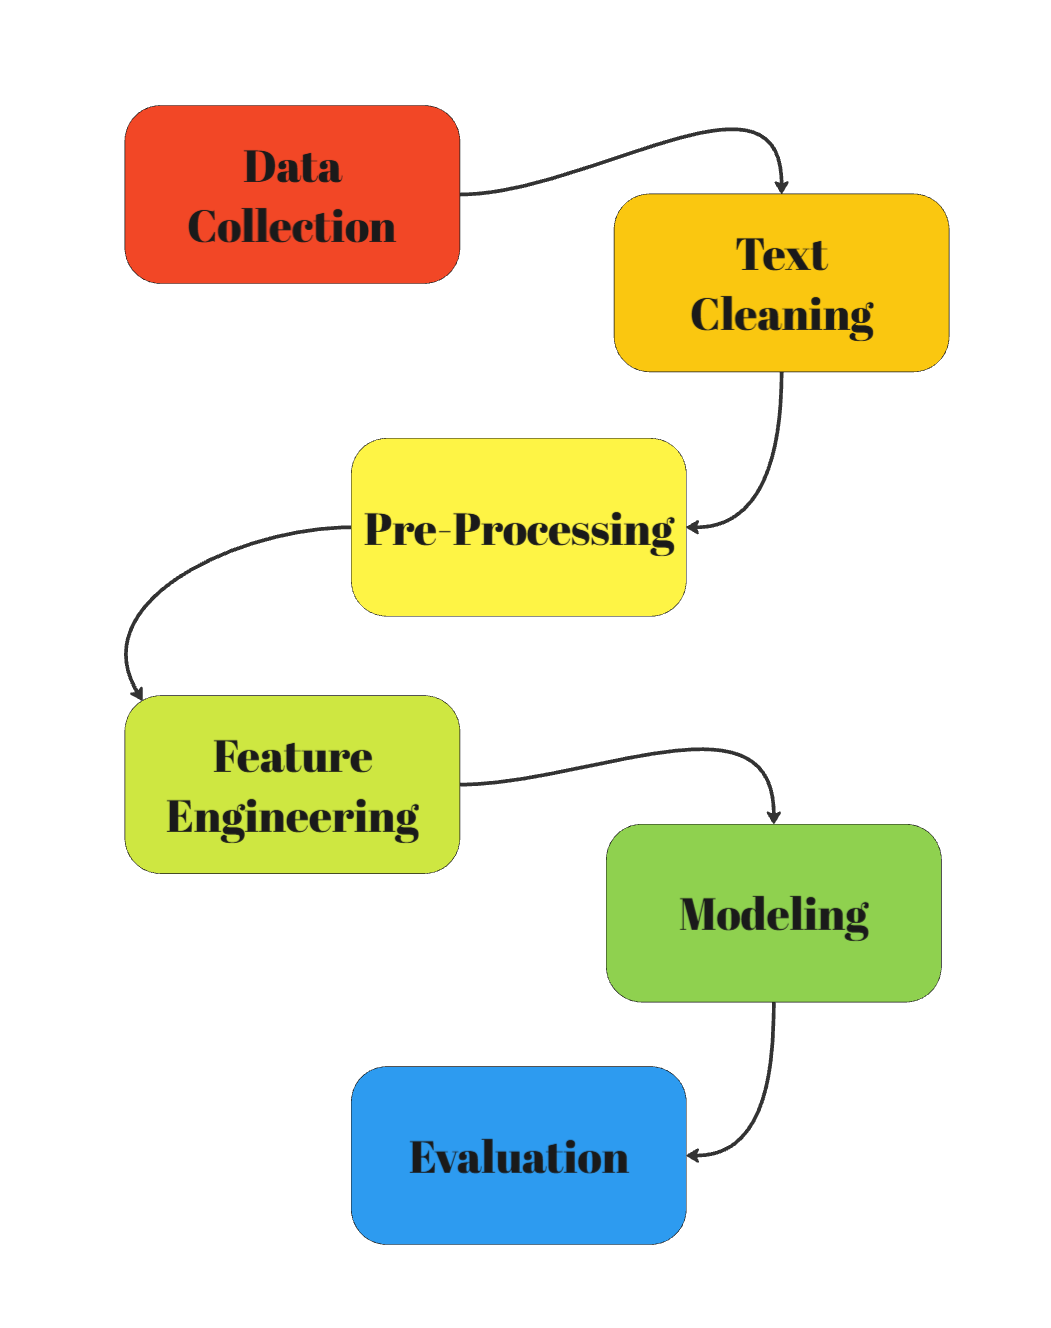

---
---
# Step 0: Importing relevant Modules

In [1]:
import pandas as pd
import nltk
import regex
import re
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

from nltk import FreqDist
from nltk.corpus import stopwords
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

from rouge import Rouge

---
# Step 1: Data Acquisition

- Downloading the .txt file and importing it into Colab.

In [3]:
# Loading the Lord of The Rings: The Fellowship of The Ring book
with open('tlotr_chapter12.txt', 'r') as file:
  text_data = file.read()

---
# Step 2: Text Processing and sentence/word separation process

- Using NLTK, we split the text into sentences.

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
sent = nltk.sent_tokenize(text_data)
sent[:20]

['Chapter 1 .',
 'A LONG-EXPECTED PARTY .',
 'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.',
 'Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return.',
 'The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure.',
 'And if that was not enough for fame, there was also his prolonged vigour to marvel at.',
 'Time wore on, but it seemed to have little effect on Mr. Baggins.',
 'At ninety he was much the same as at fifty.',
 'At ninety-nine they began to call him well-preserved; but unchanged would have been nearer the mark.',
 'There were some that shook their heads and thought this was too mu

- There seem to be some sentences that don't replace the '\n\n' and " \' " so let's fix that.

In [6]:
text_data = text_data.replace("\\n\\n",". ")
text_data = text_data.replace("\'","'")

sentences = nltk.sent_tokenize(text_data)

In [8]:
print(f'The amount of sentences this chapter has: {len(sentences)}')

The amount of sentences this chapter has: 642


In [ ]:
nltk.download('wordnet')

- For word separation, will be using 'regex', it makes a better work than NLTK.

In [10]:
words = regex.split("[\s\.\,\;\!\?]", text_data.lower())

In [11]:
print(words[:20])

['chapter', '1', '', '', 'a', 'long-expected', 'party', '', '', 'when', 'mr', '', 'bilbo', 'baggins', 'of', 'bag', 'end', 'announced', 'that', 'he']


---
# Step 3: Data Cleaning (Null values, Stop word removal, remove punctuation, push to lowercase)

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))

---
# Step 4: Pre-processing (Tokenization of words)

In [14]:
filtered_tokens = [word for word in words if word not in stop_words]

In [15]:
filtered_special_characters = [re.sub('[^a-zA-Z0-9]+', '', word) for word in filtered_tokens]
filtered_special_characters = list(filter(None, filtered_special_characters))

In [16]:
word_count = Counter(filtered_special_characters)
sorted_word_count = sorted(word_count.items(), key = lambda x: x[1], reverse = True)

---
# Step 4: Feature engineering (frequency of tokens)

In [17]:
fdist = FreqDist(sorted_word_count)

In [18]:
df = pd.DataFrame()
wordArr=[]
countArr=[]

for word, count in sorted_word_count[:50]:
    wordArr.append(word)
    countArr.append(count)


df["word"]=wordArr
df["count"]=countArr

In [19]:
df.head(21)

,word,count
0,bilbo,81
1,said,74
2,frodo,57
3,old,44
4,gandalf,41
5,one,30
6,end,28
7,say,28
8,hobbits,26
9,bag,25


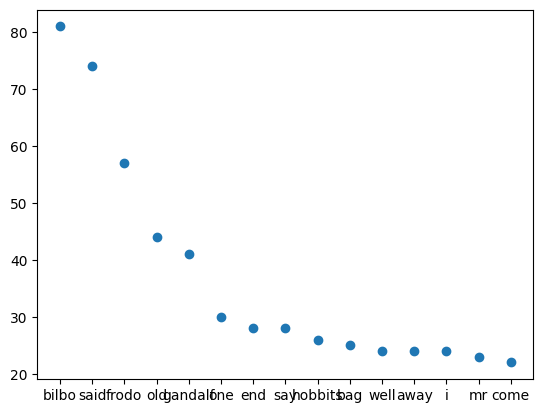

In [20]:
plt.scatter(df['word'].head(15),df['count'].head(15))

---
# Step 5: Text Summarization using TextRank and LSA.

In [ ]:
!pip install sumy
!pip install git+git://github.com/miso-belica/sumy.git

In [28]:
if __name__ == "__main__":
    parser = PlaintextParser.from_file('tlotr_chapter12.txt', Tokenizer("english"))
    stemmer = Stemmer("english")

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words("english")

    for sentence in summarizer(parser.document, 10):
        print(sentence)

He held forth at The Ivy Bush, a small inn on the Bywater road; and he spoke with some authority, for he had tended the garden at Bag End for forty years, and had helped old Holman in the same job before that.
With perfect truth: for Bilbo was very polite to him, calling him ‘Master Hamfast’, and consulting him constantly upon the growing of vegetables – in the matter of ‘roots’, especially potatoes, the Gaffer was recognized as the leading authority by all in the neighbourhood (including himself ).‘But what about this Frodo that lives with him?’ asked Old Noakes of Bywater.
It beats me why any Baggins of Hobbiton should go looking for a wife away there in Buckland, where folks are so queer.’ ‘And no wonder they’re queer,’ put in Daddy Twofoot (the Gaffer’s next-door neighbour), ‘if they live on the wrong side of the Brandywine River, and right agin the Old Forest.
The Sackville-Bagginses won’t never see the inside of Bag End now, or itis to be hoped not.’ ‘There’s a tidy bit of money 

---
# Step 6: Trying out with pretrained models.

In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer

model = Summarizer()
result = model(text_data, max_length = 200)
full = ''.join(result)

In [48]:
display(full)

'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton. At ninety-nine they began to call him well-preserved; but unchanged would have been nearer the mark. But so far trouble had not come; and as Mr. Baggins was generous with his money, most people were willing to forgive him his oddities and his good fortune. The eldest of these, and Bilbo’s favourite, was young Frodo Baggins. Both father and son were on very friendly terms with Bilbo and Frodo. Small wonder that trouble came of it, I say. Anyway: there was this Mr. Frodo left an orphan and stranded, as you might say, among those queer Bucklanders, being brought up anyhow in Brandy Hall. Mr. Bilbo never did a kinder deed than when he brought the lad back to live among decent folk. ‘ But I reckon it was a nasty knock for those Sackville-Bagginses. They thought they were going to get Bag End, that 

# Step 7: Evaluating the Results using ROUGE score.

In [ ]:
!pip install rouge

In [50]:
hypothesis = full
reference = text_data

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

In [51]:
# This will give three values:
# r : stands for recall
# p : means precission
# f : shows the f1_score
scores

[{'rouge-1': {'r': 0.23093525179856114,
   'p': 0.9953488372093023,
   'f': 0.374890507891779},
  'rouge-2': {'r': 0.15210274490052883,
   'p': 0.9386169386169386,
   'f': 0.2617835061056981},
  'rouge-l': {'r': 0.23093525179856114,
   'p': 0.9953488372093023,
   'f': 0.374890507891779}}]

---
# Overall Strengths and Limitations
- This pipeline uses pretrained models that have been worked through by the online community and it can be updated at any time which makes it better as time goes on. On top of that, if the file is .txt, the pipeline can work with it and clean it prior to using it in the models themselves.
- It also haves an evaluation metric that can give you an idea of which of the models was better reviewd and then the user can take a look for themselves.
- The limitations of this pipeline is that, if the file is not first turned from a .pdf into a .txt it will not run. The user first has to be sure of downloading or converting the file to .txt for this to work properly.

# Data-Driven Recommendations
- Looking into the results of the models, it can be assured that any one that uses these pipeline will most certainly optimize their time in choosing a book that might resonate with them using the text summarization, not only that but any student or professor that needs to check on multiple research papers, this pipeline will definitely help with minimizing the time wasted in searching and reading in vain. The pipeline can for sure be perfected with more time put into it but it could be used and executed.

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [57]:
!jupyter nbconvert --to html BigData_Final_Individual_Project.ipynb

[NbConvertApp] Converting notebook BigData_Final_Individual_Project.ipynb to html
[NbConvertApp] Writing 770460 bytes to BigData_Final_Individual_Project.html
